<a href="https://colab.research.google.com/github/sonalj101/DataAnalyticsAndVisualization-Fundamentals/blob/main/Dec23_Feature_Engg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, levene, shapiro, ks_2samp

#Loan.csv

In [2]:
#download and load the 'loan.csv' file into a dataframe

!gdown 1nmdYdlg_Ha7fCpS89CxDk478SXbdlH4z
loan = pd.read_csv ("loan.csv")
loan_2 = pd.read_csv ("loan.csv") #a copy of df to later make manipulations in

loan

Downloading...
From: https://drive.google.com/uc?id=1nmdYdlg_Ha7fCpS89CxDk478SXbdlH4z
To: /content/loan.csv
100% 38.0k/38.0k [00:00<00:00, 9.16MB/s]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#Let's observe the data types of different columns

loan.info()

In [ ]:
#How many people got their loan applications approved?



#ApplicantIncome distribution

In [ ]:
#Histogram of applicant incomes


In [ ]:
#Skewness of the above distribution




In [ ]:
#Exessive Kurtosis value



In [ ]:
#Skewness in ApplicantIncome



#ApplicantIncome vs Loan_Status

In [ ]:
#ApplicantIncome vs Loan_Status
sns.kdeplot(data=loan,x='ApplicantIncome',hue='Loan_Status')

In [ ]:
#ApplicantIncome vs Loan_Status

accepted_incomes = loan[loan['Loan_Status'] == 'Y']['ApplicantIncome']
rejected_incomes = loan[loan['Loan_Status'] == 'N']['ApplicantIncome']

In [ ]:
print(accepted_incomes.mean())
print(rejected_incomes.mean())

In [ ]:
#are variances of both sample populations equal

#levene test

#Ho: the variances are equal

levene(accepted_incomes,rejected_incomes)

#CANNOT Reject Ho

In [ ]:
#do the samples come from gaussian populations

#shapiro test
#Ho: the sample came from a gaussian distribution

shapiro(accepted_incomes)

In [ ]:
shapiro(rejected_incomes)

#Loan status vs education

In [ ]:
#crosstab of Loan_status vs Education

ctab_edu = pd.crosstab(loan['Loan_Status'],loan['Education'])

ctab_edu

In [ ]:
#Let's see the above data visually



In [ ]:
#chi2 test

#Ho: Education and Loan_Status are independent



#LoanAmount vs Loan_Status

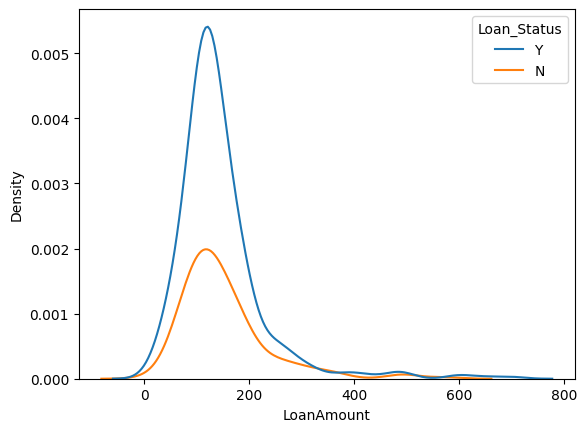

In [ ]:
sns.kdeplot(data=loan,x='LoanAmount',hue='Loan_Status')


plt.show()

In [ ]:
#splitting the loan amounts into two arrays based on loan status

accepted_loan_amount = loan[loan['Loan_Status'] == "Y"]['LoanAmount']
rejected_loan_amount = loan[loan['Loan_Status'] == "N"]['LoanAmount']

In [ ]:
#2 sample ks test

#Ho: two samples come from same population

